In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm
import skimage

In [2]:
seed = 42
np.random.seed = 42

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading data
folder_images_train = r'/content/drive/MyDrive/Colab_Notebooks/UNet/data_glomerulus_codex/images/train'
folder_masks_train = r'/content/drive/MyDrive/Colab_Notebooks/UNet/data_glomerulus_codex/masks/train'
folder = r'/content/drive/MyDrive/Colab_Notebooks/UNet/data_glomerulus_codex/images/test'

l1 = list(os.listdir(folder_images_train))
l2 = list(os.listdir(folder_masks_train))

l1.sort()
l2.sort()

IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 3

X_train = np.zeros((len(l1),IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),dtype=np.uint8)
Y_train = np.zeros((len(l2),IMG_HEIGHT, IMG_WIDTH, 1),dtype=np.bool)
count = 0

for filename_image, filename_maks in zip(l1,l2):
  img_image = cv2.imread(os.path.join(folder_images_train,filename_image))
  img_mask = cv2.imread(os.path.join(folder_masks_train,filename_maks),0)
  _,thresh1 = cv2.threshold(img_mask,10,255,cv2.THRESH_BINARY)

  img_image = cv2.resize(img_image,(IMG_HEIGHT,IMG_WIDTH),interpolation = cv2.INTER_CUBIC)
  img_image = cv2.cvtColor(img_image, cv2.COLOR_BGR2RGB)
  thresh1 = cv2.resize(thresh1,(IMG_HEIGHT,IMG_WIDTH),interpolation = cv2.INTER_CUBIC)
  skimage_resized = skimage.transform.resize(thresh1, (IMG_HEIGHT,IMG_WIDTH,1), order=1, mode='constant', cval=0, clip=True)

  X_train[count] = img_image
  Y_train[count] = skimage_resized

  count = count + 1

l3 = list(os.listdir(folder))
X_test = np.zeros((len(l3),IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),dtype=np.uint8)
count = 0

for filename in l3:
  img = cv2.imread(os.path.join(folder,filename))
  img = cv2.resize(img_image,(IMG_HEIGHT,IMG_WIDTH),interpolation = cv2.INTER_CUBIC)
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  X_test[count] = img
  count = count + 1

<ipython-input-4-992307182233>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(l2),IMG_HEIGHT, IMG_WIDTH, 1),dtype=np.bool)


(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 5

<ipython-input-5-d0ae91d44205>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 7))


(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)
(30, 512, 512, 3) (30, 512, 512, 1) (4, 512, 512, 3)


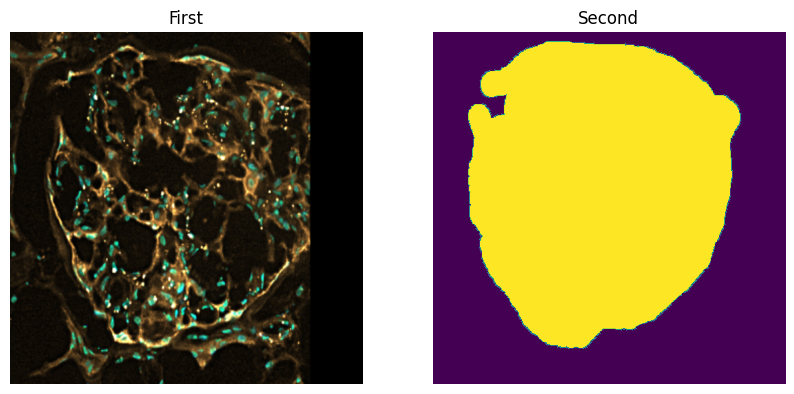

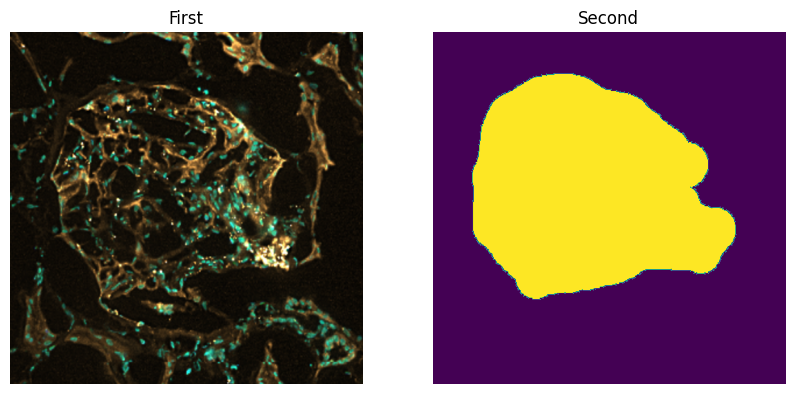

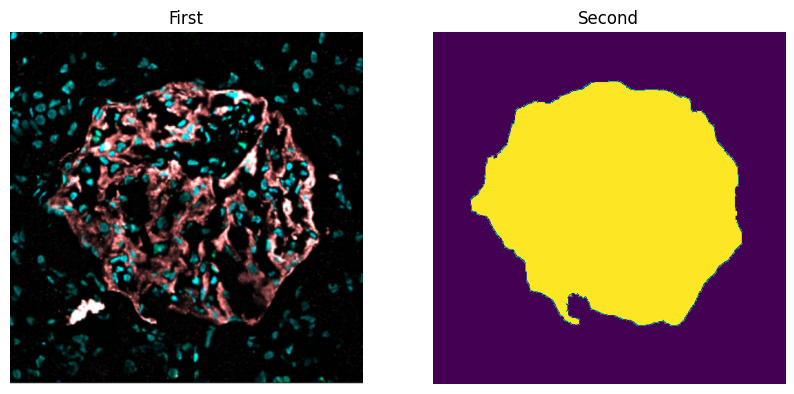

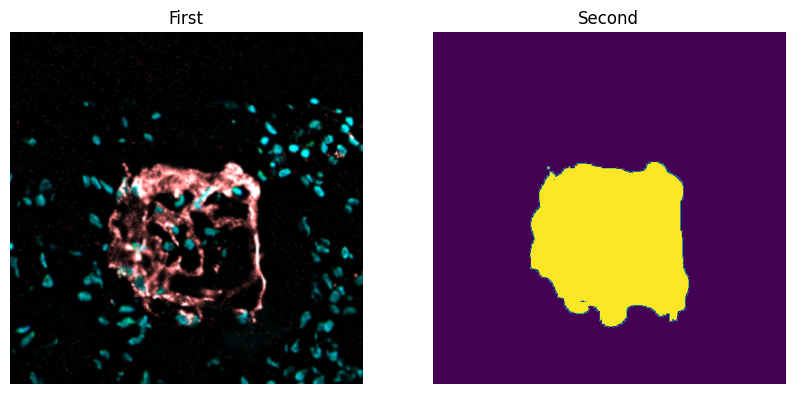

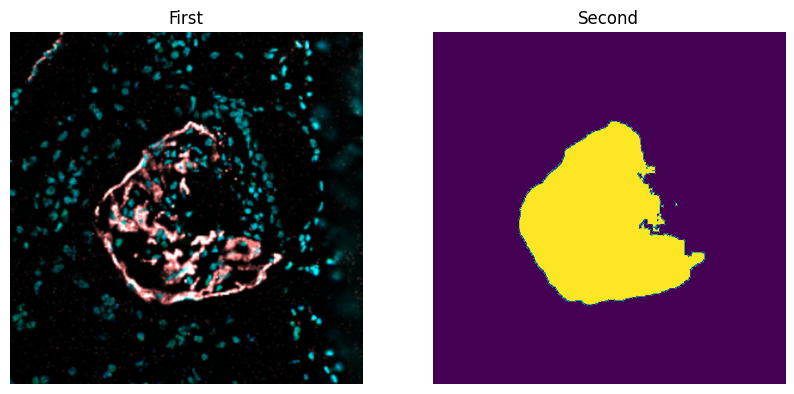

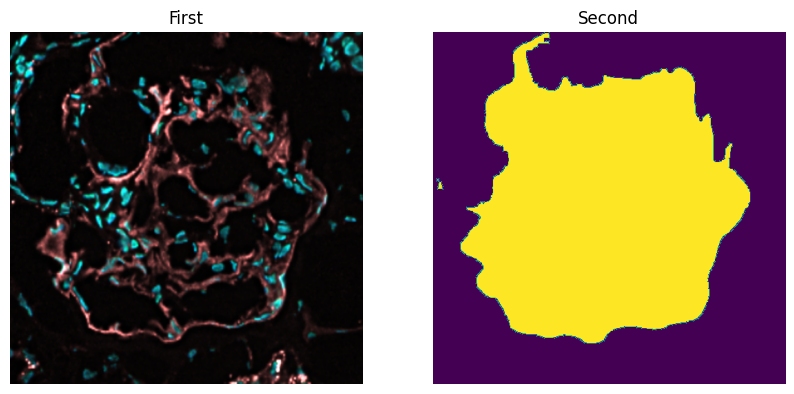

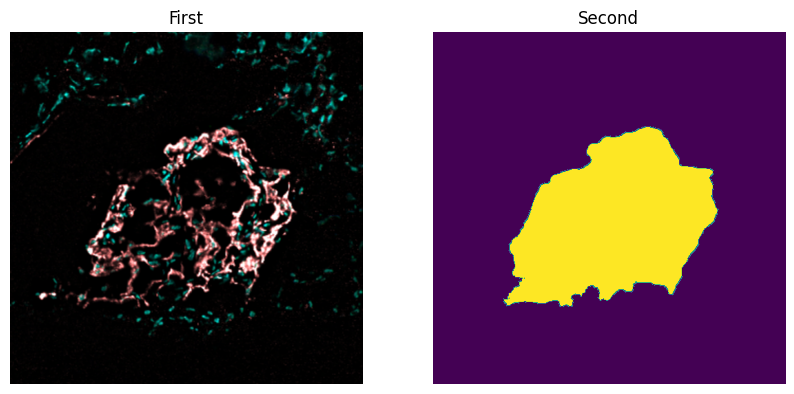

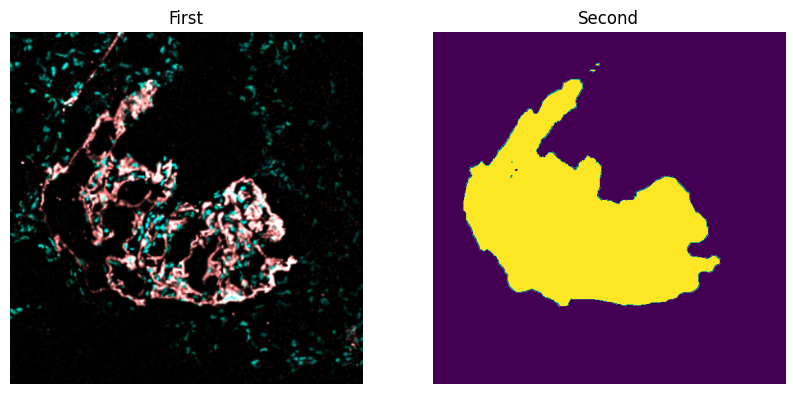

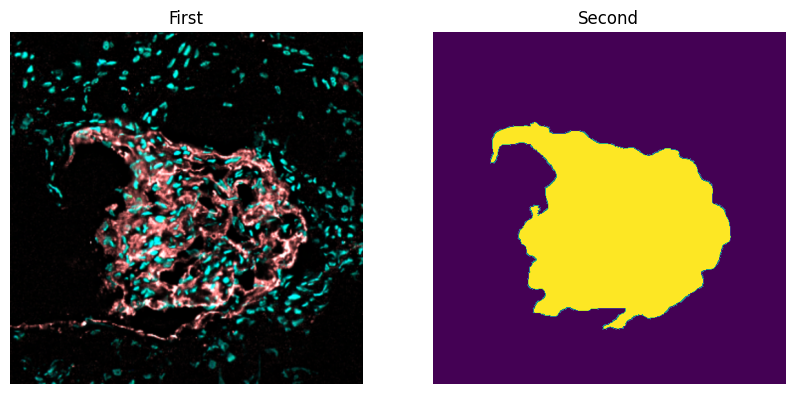

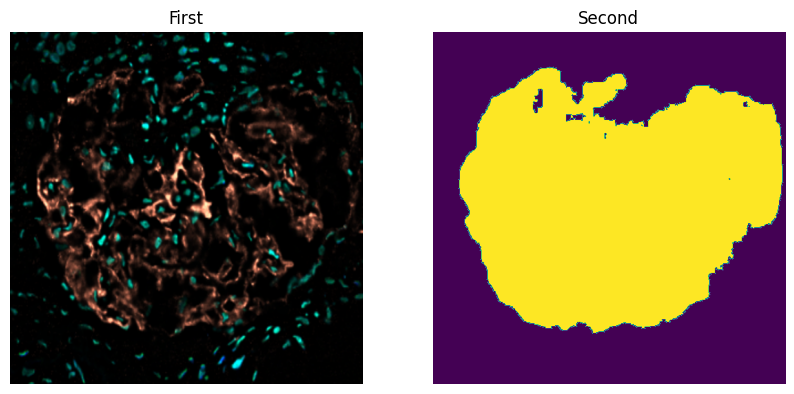

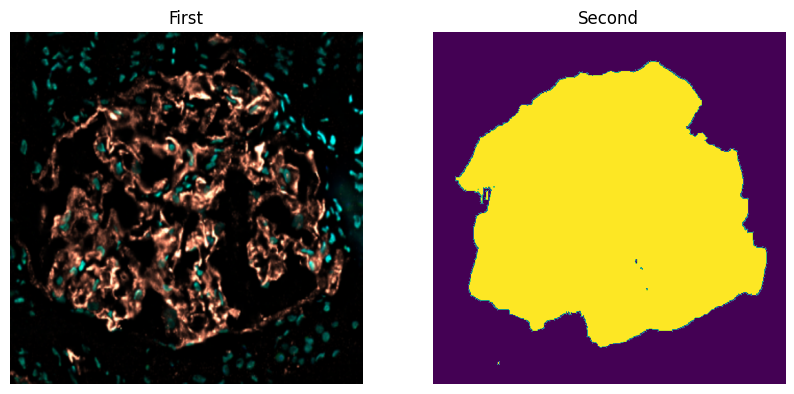

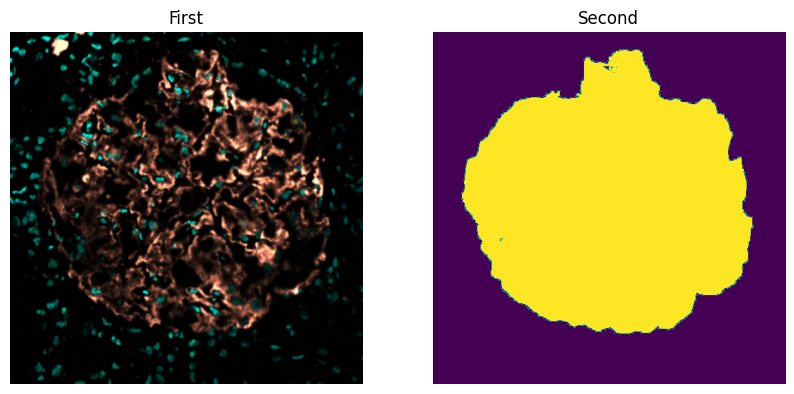

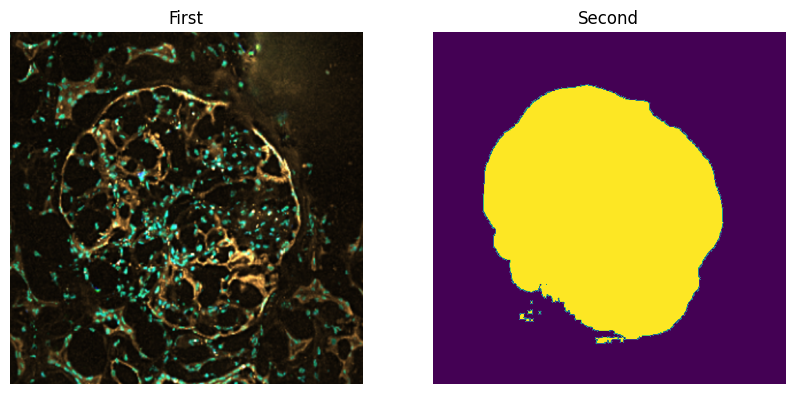

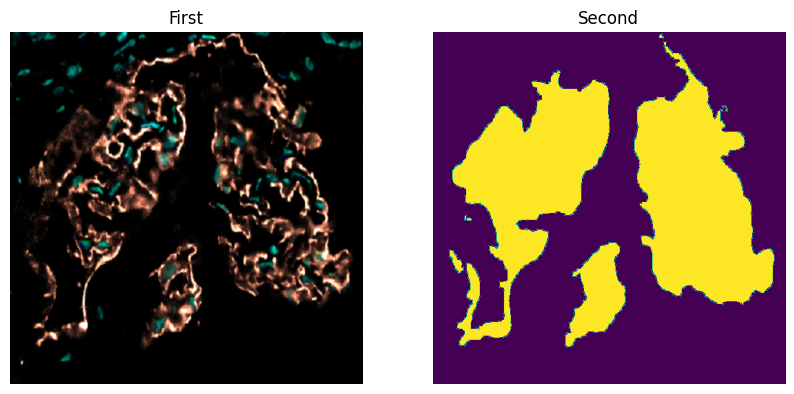

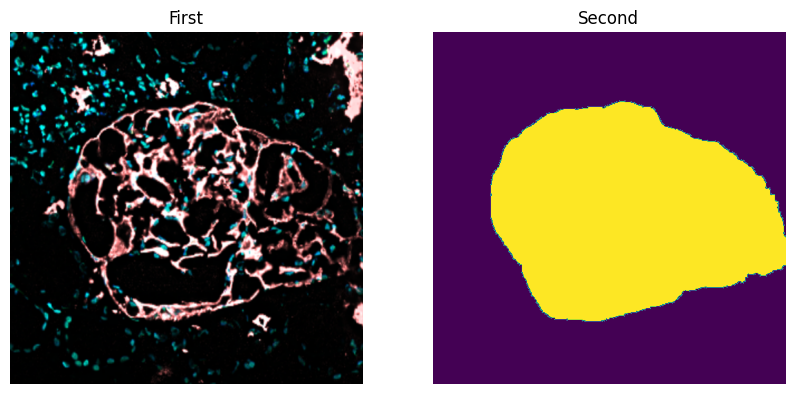

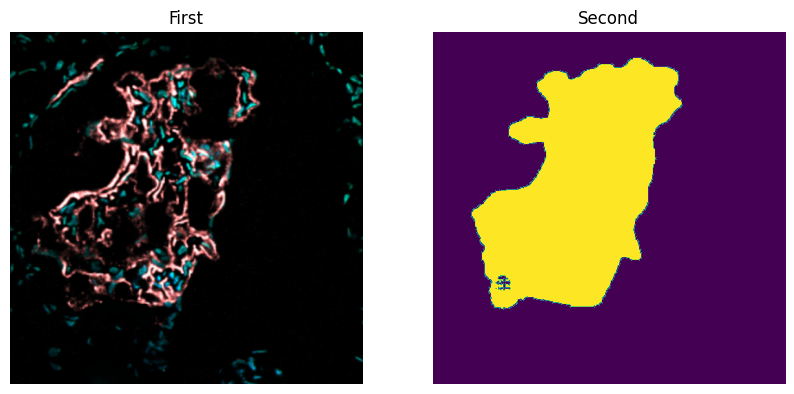

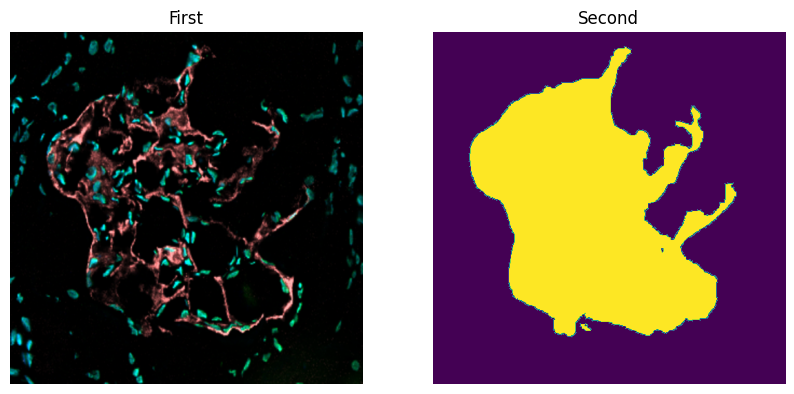

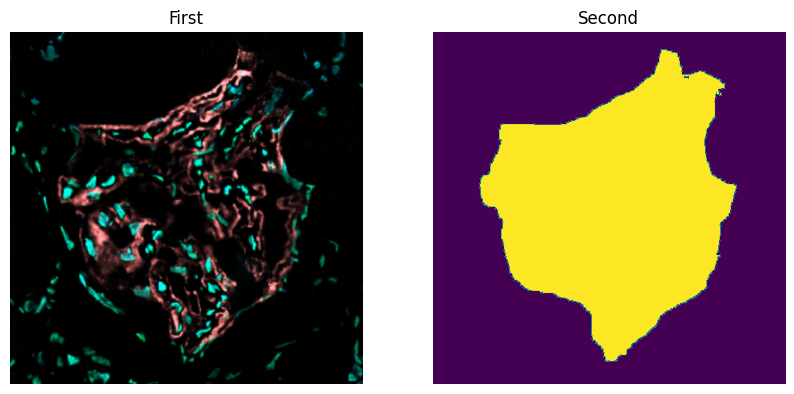

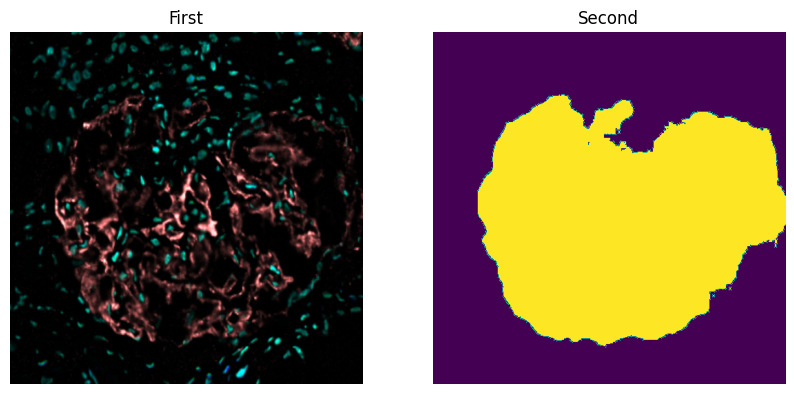

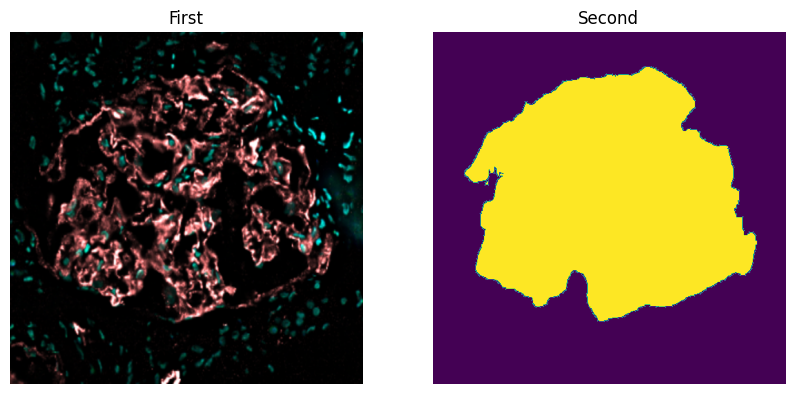

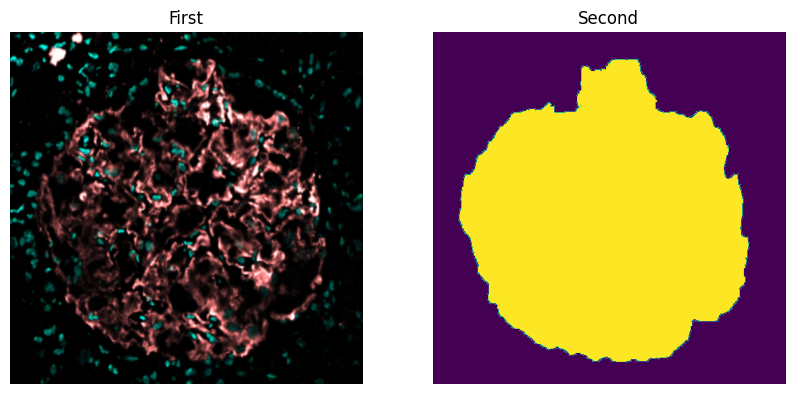

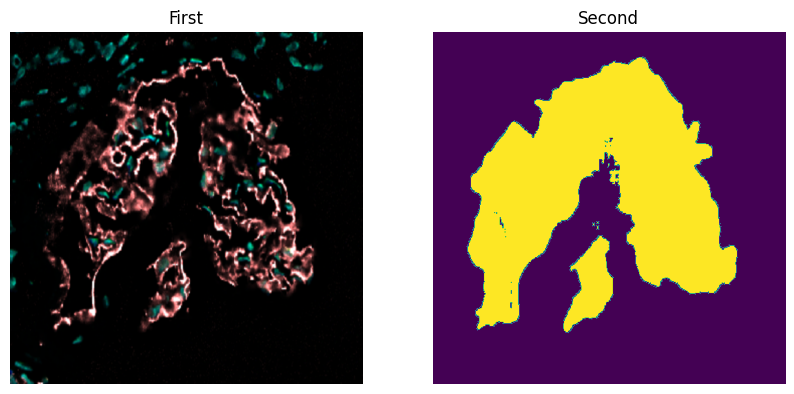

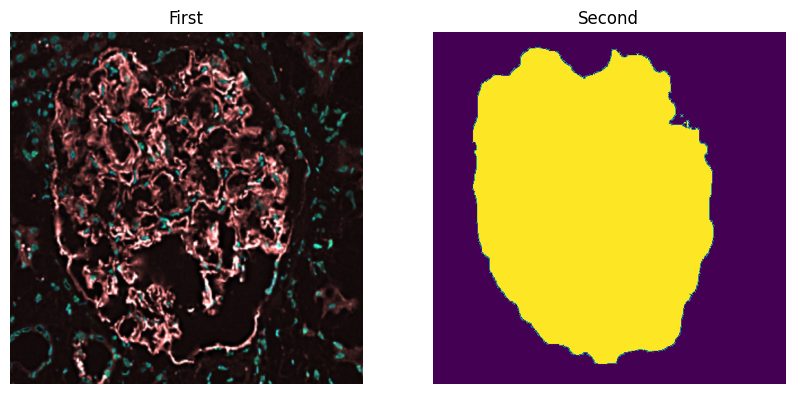

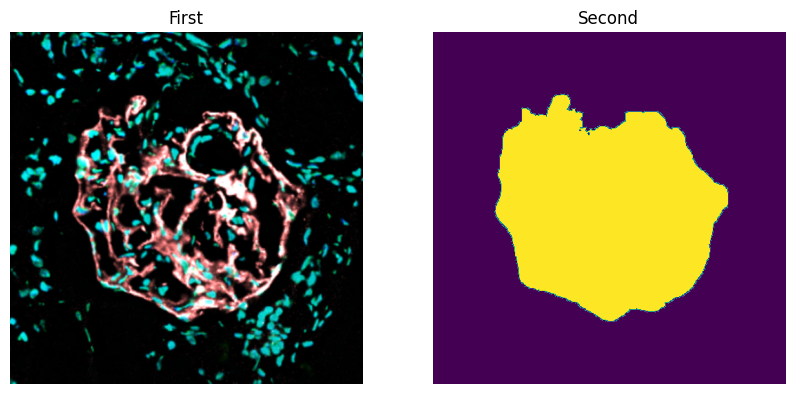

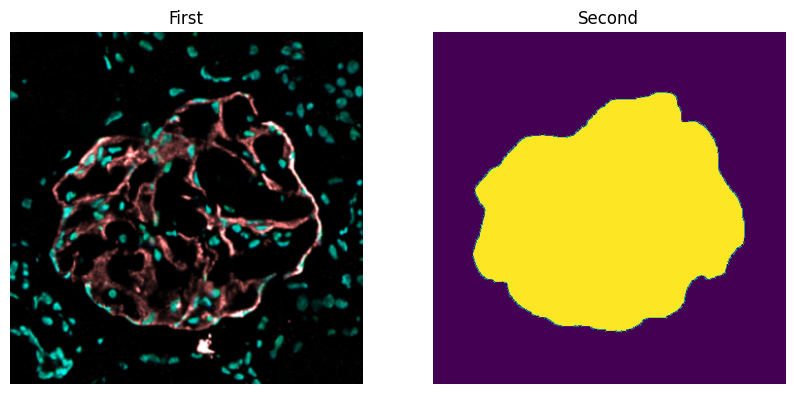

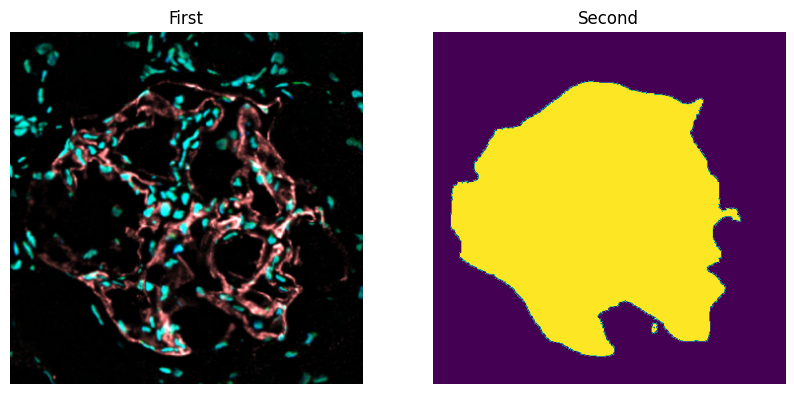

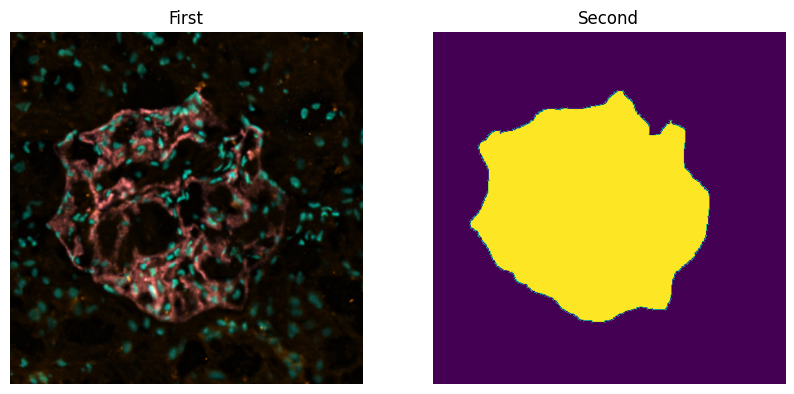

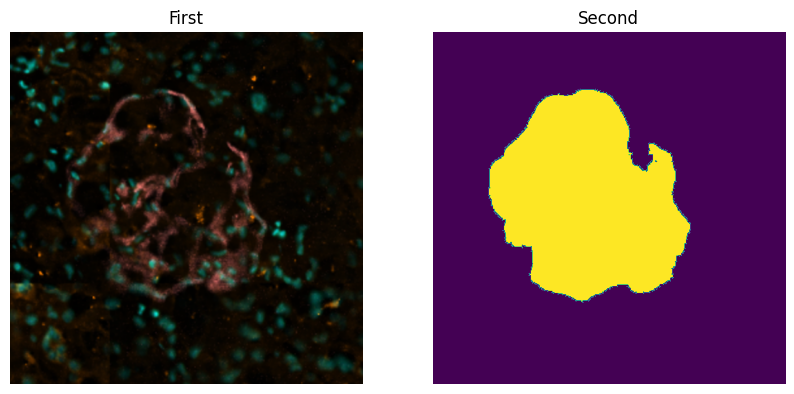

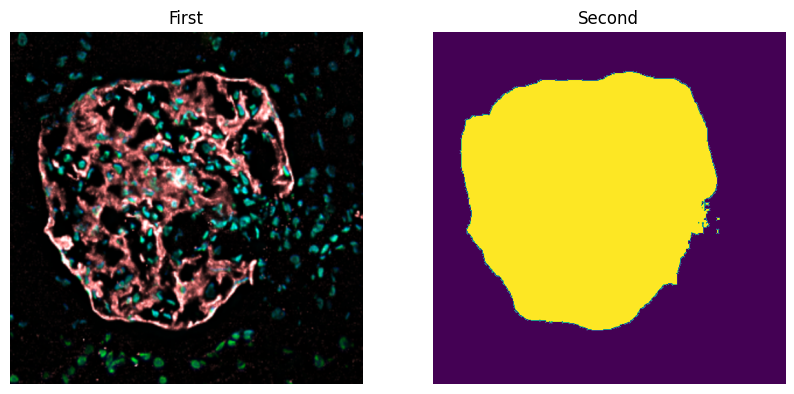

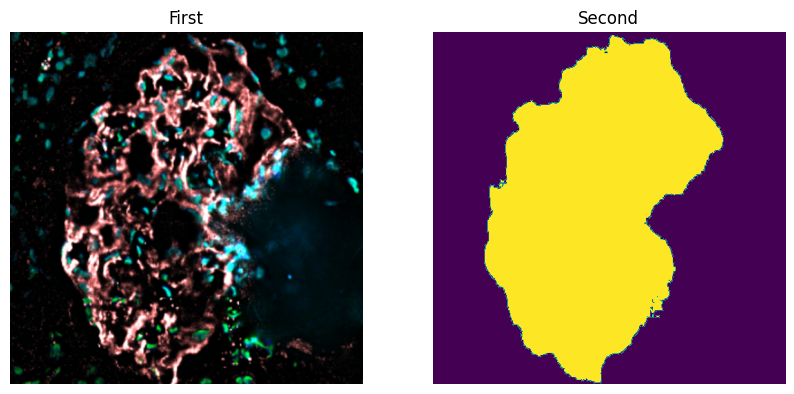

In [5]:
for i in range(0,len(X_train)):
  fig = plt.figure(figsize=(10, 7))
  print(X_train.shape,Y_train.shape,X_test.shape)
  rows = 1
  columns = 2

  # Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)

  # showing image
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title("First")

  # Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)

  # showing image
  plt.imshow(Y_train[i])
  plt.axis('off')
  plt.title("Second")

In [6]:
# IOU metric
# from keras import backend as K
def iou_coef(y_true, y_pred, smooth=1):
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=[1,2,3])
    union = tf.keras.backend.sum(y_true,[1,2,3])+tf.keras.backend.sum(y_pred,[1,2,3])-intersection
    iou = tf.keras.backend.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def dice_coef(y_true, y_pred, smooth=1):
    intersection = tf.keras.backend.sum(y_true * y_pred, axis=[1,2,3])
    union = tf.keras.backend.sum(y_true, axis=[1,2,3]) + tf.keras.backend.sum(y_pred, axis=[1,2,3])
    dice = tf.keras.backend.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [7]:
#Build the model
IMG_WIDTH = 512
IMG_HEIGHT = 512
IMG_CHANNELS = 3

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#
def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = inputs.shape
    x = tf.keras.layers.GlobalAveragePooling2D(keepdims=True)(inputs)
    x = tf.keras.layers.Dense(c//ratio, activation="relu", use_bias=False)(x)
    x = tf.keras.layers.Dense(c, activation="sigmoid", use_bias=False)(x)
    x = inputs * x
    print(inputs.shape, x.shape)
    return x

def recurrent_block(x, num_filter, strides=1):
  x = tf.keras.layers.Conv2D(num_filter, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
  for i in range(2):
    if i == 0:
      print('in 0 loop')
      x_rec = tf.keras.layers.Conv2D(num_filter, (3, 3), activation='relu', padding='same')(x)
    x_rec = tf.keras.layers.Dropout(0.1)(x_rec)
    x_rec = tf.keras.layers.Conv2D(num_filter, (3, 3), activation='relu', padding='same')(x + x_rec)
  return x_rec

def residual_block(s, num_filter, strides=1):
  #x = tf.keras.layers.Conv2D(num_filter, (3, 3), activation='relu', padding='same',strides=strides)(s)
  #x = tf.keras.layers.Dropout(0.1)(x)
  #x = tf.keras.layers.Conv2D(num_filter, (3, 3), activation='relu', padding='same')(x)
  x = recurrent_block(s,num_filter)
  x1 = SqueezeAndExcitation(x)

  s1 = tf.keras.layers.Conv2D(num_filter, (1, 1), activation='relu', padding='same',strides=strides)(s)

  x1 = x1 + s1

  return x1

#Contraction path
c1 = residual_block(inputs, 128)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)
print(c1.shape,p1.shape)

c2 = residual_block(p1, 256)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
print(c2.shape,p2.shape)

##c3 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
##c3 = tf.keras.layers.Dropout(0.1)(c3)
##c3 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
c3 = residual_block(p2, 512)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
print(c3.shape,p3.shape)

##c4 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
##c4 = tf.keras.layers.Dropout(0.2)(c4)
##c4 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
c4 = residual_block(p3, 1024)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
print(c4.shape,p4.shape)

#c5 = tf.keras.layers.Conv2D(2048, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
#c5 = tf.keras.layers.Dropout(0.1)(c5)
#c5 = tf.keras.layers.Conv2D(2048, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
c5 = residual_block(p4, 2048)
print(c5.shape)

#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(1024, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
##c6 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
##c6 = tf.keras.layers.Dropout(0.2)(c6)
##c6 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
c6 = residual_block(u6, 1024, 1)
print(u6.shape, c6.shape)

u7 = tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
##c7 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
##c7 = tf.keras.layers.Dropout(0.1)(c7)
##c7 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
c7 = residual_block(u7, 512, 1)
print(u7.shape, c7.shape)

u8 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
##c8 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
##c8 = tf.keras.layers.Dropout(0.2)(c8)
##c8 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
c8 = residual_block(u8, 256, 1)
print(u8.shape, c8.shape)

u9 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
##c9 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
##c9 = tf.keras.layers.Dropout(0.1)(c9)
##c9 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
c9 = residual_block(u9, 128, 1)
print(u9.shape, c9.shape)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
print(outputs.shape)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

in 0 loop
(None, 512, 512, 128) (None, 512, 512, 128)
(None, 512, 512, 128) (None, 256, 256, 128)
in 0 loop
(None, 256, 256, 256) (None, 256, 256, 256)
(None, 256, 256, 256) (None, 128, 128, 256)
in 0 loop
(None, 128, 128, 512) (None, 128, 128, 512)
(None, 128, 128, 512) (None, 64, 64, 512)
in 0 loop
(None, 64, 64, 1024) (None, 64, 64, 1024)
(None, 64, 64, 1024) (None, 32, 32, 1024)
in 0 loop
(None, 32, 32, 2048) (None, 32, 32, 2048)
(None, 32, 32, 2048)
in 0 loop
(None, 64, 64, 1024) (None, 64, 64, 1024)
(None, 64, 64, 2048) (None, 64, 64, 1024)
in 0 loop
(None, 128, 128, 512) (None, 128, 128, 512)
(None, 128, 128, 1024) (None, 128, 128, 512)
in 0 loop
(None, 256, 256, 256) (None, 256, 256, 256)
(None, 256, 256, 512) (None, 256, 256, 256)
in 0 loop
(None, 512, 512, 128) (None, 512, 512, 128)
(None, 512, 512, 256) (None, 512, 512, 128)
(None, 512, 512, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)     

In [8]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_glomerulus.h5', verbose = 1, save_best_only = True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss'), tf.keras.callbacks.TensorBoard(log_dir='logs')]
results = model.fit(X_train, Y_train, validation_split=0.15, batch_size = 1, epochs = 35, callbacks = callbacks)

Epoch 1/35
25/25 [==============================] - 112s 2s/step - loss: 15.9815 - accuracy: 0.4748 - val_loss: 1.3041 - val_accuracy: 0.4661
Epoch 2/35
25/25 [==============================] - 49s 2s/step - loss: 1.0400 - accuracy: 0.6201 - val_loss: 0.7517 - val_accuracy: 0.5826
Epoch 3/35
25/25 [==============================] - 51s 2s/step - loss: 0.7844 - accuracy: 0.6806 - val_loss: 0.6717 - val_accuracy: 0.6505
Epoch 4/35
25/25 [==============================] - 51s 2s/step - loss: 0.6697 - accuracy: 0.7307 - val_loss: 0.6046 - val_accuracy: 0.7191
Epoch 5/35
25/25 [==============================] - 50s 2s/step - loss: 0.5795 - accuracy: 0.7721 - val_loss: 0.5297 - val_accuracy: 0.7672
Epoch 6/35
25/25 [==============================] - 52s 2s/step - loss: 0.5531 - accuracy: 0.7924 - val_loss: 0.5532 - val_accuracy: 0.7470
Epoch 7/35
25/25 [==============================] - 52s 2s/step - loss: 0.6758 - accuracy: 0.7890 - val_loss: 0.6031 - val_accuracy: 0.6892
Epoch 8/35
25/25 [

1/1 [==============================] - 2s 2s/step


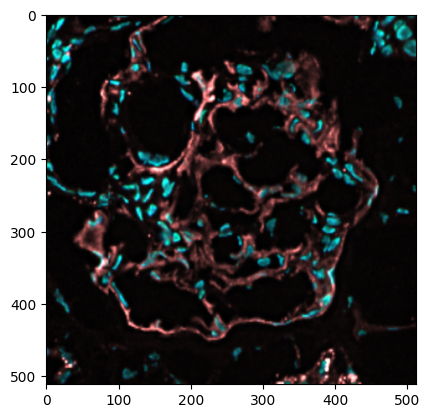

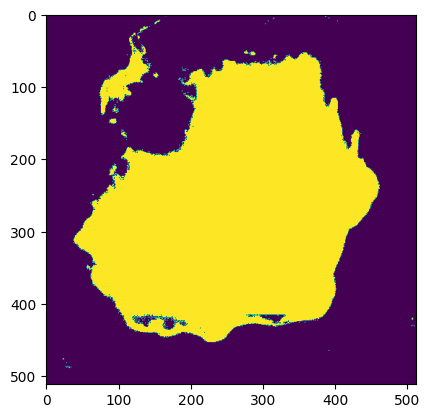

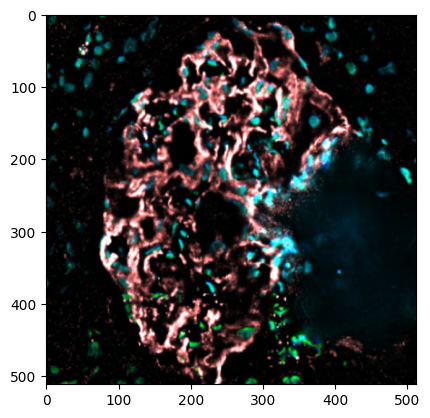

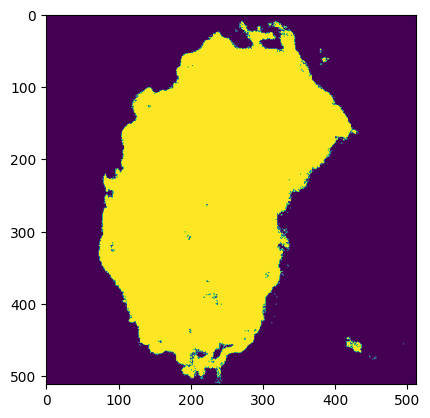

In [14]:
preds_train = model.predict(X_train[5:6], verbose = 1)
preds_test = model.predict(X_test[0:3], verbose = 1)

preds_train_t = (preds_train > 0.6).astype(np.uint8)
preds_test_t = (preds_test > 0.6).astype(np.uint8)

plt.imshow(X_train[5])
plt.show()
plt.imshow(preds_train_t[0])
plt.show()

plt.imshow(X_test[2])
plt.show()
plt.imshow(preds_test_t[2])
plt.show()

In [16]:
model.save('/content/drive/MyDrive/Weights/model_for_glomerulus_13.h5')

In [17]:
from tensorflow.keras.models import load_model

# load model
savedModel=load_model('/content/drive/MyDrive/Weights/model_for_glomerulus_13.h5')
savedModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 128)        3584      ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 128)        147584    ['conv2d[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 512, 512, 128)        0         ['conv2d_1[0][0]']            
                                                                                              

1/1 [==============================] - 2s 2s/step


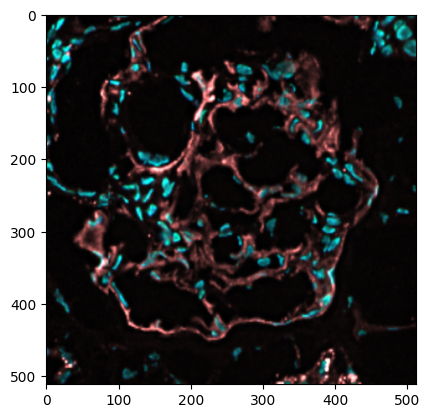

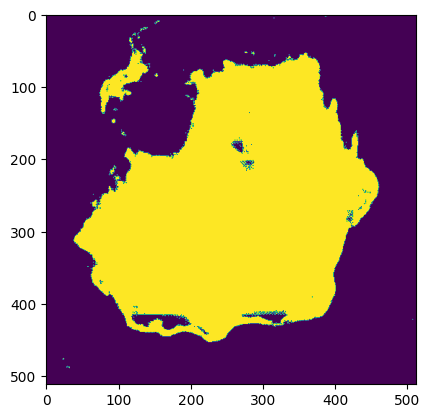

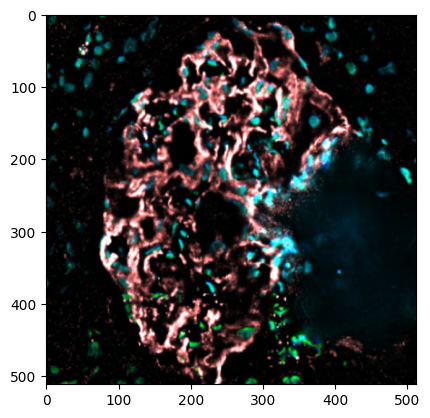

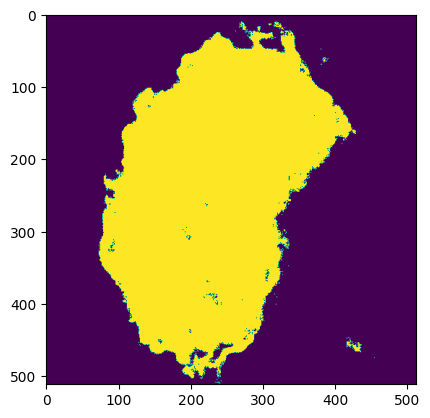

In [19]:
preds_train1 = savedModel.predict(X_train[5:6], verbose = 1)
preds_test1 = savedModel.predict(X_test[0:3], verbose = 1)

preds_train_t1 = (preds_train1 > 0.75).astype(np.uint8)
preds_test_t1 = (preds_test1 > 0.7).astype(np.uint8)

plt.imshow(X_train[5])
plt.show()
plt.imshow(preds_train_t1[0])
plt.show()

plt.imshow(X_test[2])
plt.show()
plt.imshow(preds_test_t1[2])
plt.show()

In [13]:
model.save('model_for_glomerulus_7.h5')